# Statistical Learning Project


## About the data:

- The data consists of medical costs of people defined by certain conditions.
- The data belongs to healthcare domain.
- Attributes of the data:
    - Age: Age of the primary applicant.
    - Sex: Gender of the primary applicant. Either Male or Female.
    - BMI: Body Mass Index of the primary applicant. Weights that are relatively high or low relative to height. Uses the ratio of height to weight.
    - Children: Number of dependents.
    - Smoker: Does the primary applicant smoke or not?
    - Region: The applicant's residential area in the US. For example: northeast, southeast, southwest, northwest.
    - Charges: Individual medical costs billed by health insurance.
    

In [1]:
# importing the necessary libraries. 
# We can add more libraries in the further cells, depending on our need of obesrvations and testings. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# I have created a dataframe named ins.
# ins reads the data from insurance.csv and converts it into a dataframe.
ins = pd.read_csv('insurance.csv')

In [4]:
# I have used the head() in order to get the view of the first 5 rows of the dataframe.
# head() gives me a view of what kind of data to expect for each attribute i.e. int or float or object
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# I have used the shape property of pandas to retrieve the rows and columns of the 
ins.shape

(1338, 7)

#### From the above output we now know that, ins has 1338 records(rows) and 7 attributes(columns).

In [6]:
# We will now check the data types of each column and also check the presence of null values for each column.
# I have used the info() to retrieve the data types of the columns and also to check for the null values for each column.
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Let us read the above result:
- From the first line we get to know that ins is a pandas dataframe.
- From the second line we get to know that the range index of ins varies from 0 to 1337.
- From the third line, we see a table that consists of the following:
    - #: Serial Number (in this case it varies from 0 to 6, 7 columns).
    - Column: Name of the column(age, sex, bmi, children, smoker, region, charges)
    - Non-Null Count: We can get two values here null or non null (in our case we have got non null for all the column names, indicating absence of null values in any columns).
    - Dtype: Data type of each column.
- From the fourth line, we get to know the number of columns for each data type.
- From the fifth line, we get to know the amount of memory that is being used by this dataframe.

### Five Point Summary:

A five point summary talks about the following characteristics of the numerical data present in the dataframe.
1. Min
2. Q1 (25th Percentile)
3. Q2 (50th Percentile)
4. Q3 (75th Percentile)
5. Max

We can find the above values using the describe() or also individually.


In [7]:
# Finding the 4 Point summary using the describe().
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
ins.min(numeric_only = True) #considering only numeric columns

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64

In [9]:
ins.quantile(0.25) # 0.25 indicating the 25th percentile

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64

In [10]:
ins.quantile(0.50) # 0.50 indicating the 50th percentile or the median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64

In [11]:
ins.quantile(0.75) # 0.75 indicating the 75th percentile

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64

In [15]:
ins.max(numeric_only = True) #considering only numeric columns

age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64

### From the above 5 point summary we can find out two more information:

1. Range: This will tell us the spread of the data. max-min
2. IQR: The interquartile range is a measure of where the “middle fifty” is in a data set. Where a range is a measure of where the beginning and end are in a set, an interquartile range is a measure of where the bulk of the values lie. Q3-Q1

In [16]:
ins.max(numeric_only = True)-ins.min(numeric_only = True) #range of each column

age            46.00000
bmi            37.17000
children        5.00000
charges     62648.55411
dtype: float64

In [17]:
ins.quantile(0.75) - ins.quantile(0.25) #IQR of each column

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

### Let us check the distribution of BMI, Age and Charges. We will use the distplot() from the seaborn library.

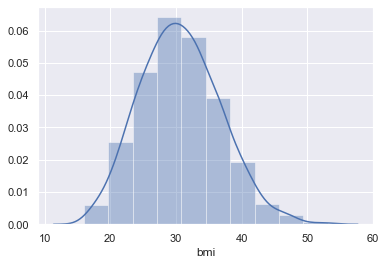

In [30]:
sns.distplot(ins['bmi'], bins = 10);

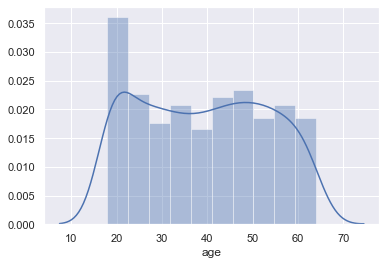

In [24]:
sns.distplot(ins['age'], bins = 10);

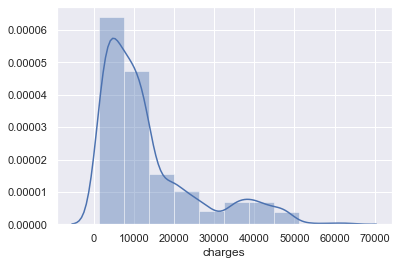

In [31]:
sns.distplot(ins['charges'], bins = 10);

#### From the above charts we can conclude that:
1. BMI has close to normal distribution.
2. Age has a very varied dsitribution.
3. Charges has its distribution right skewed.

### Let's check the skewness of the BMI, Age and Charges.

1. A skewness value of 0 in the output denotes a symmetrical distribution.
2. A negative skewness value in the output indicates an asymmetry and the tail is larger towards the left hand side of the distribution.
3. A positive skewness value in the output indicates an asymmetry and the tail is larger towards the right hand side of the distribution.

In [32]:
ins['bmi'].skew()

0.2840471105987448

In [33]:
ins['age'].skew()

0.05567251565299186

In [34]:
ins['charges'].skew()

1.5158796580240388

##### We now know that bmi is slightly right skewed, age is very close to a symmetrical distribution and charges is very much skewed to the right.

### We will now check for outliers in BMI, Age and Charges.

 An outlier is a data point that differs significantly from other observations present in the data.

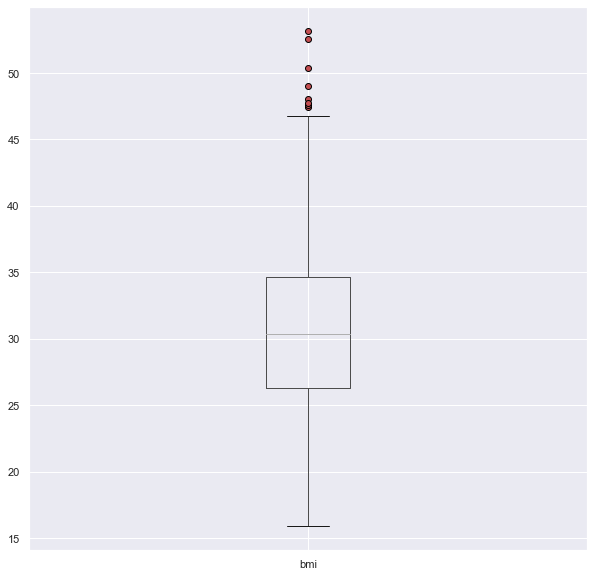

In [48]:
red_circle = dict(markerfacecolor='r', marker='o')
ins.boxplot(['bmi'], figsize = (10,10), flierprops = green_diamond)
plt.show()

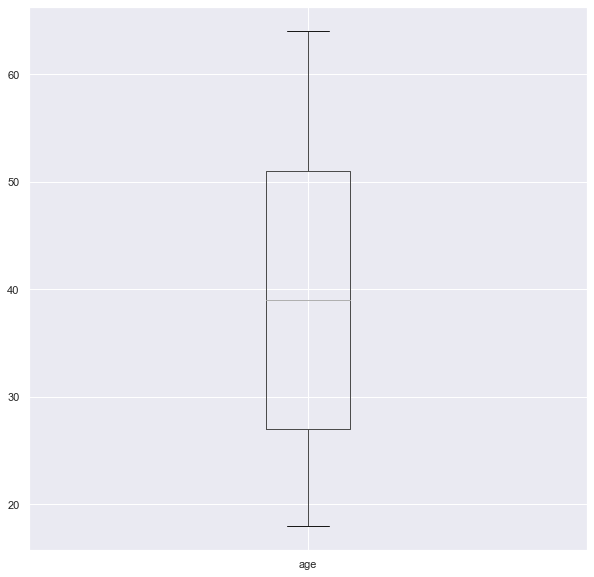

In [53]:
red_circle = dict(markerfacecolor='r', marker='o')
ins.boxplot(['age'], figsize = (10,10), flierprops = red_circle)
plt.show()

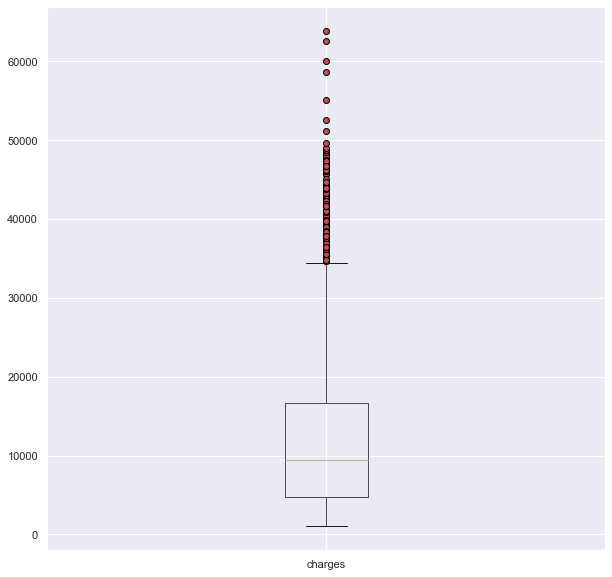

In [54]:
red_circle = dict(markerfacecolor='r', marker='o')
ins.boxplot(['charges'], figsize = (10,10), flierprops = red_circle)
plt.show()

### We have 3 categorical data. Sex, Children and Region. We will be plotting them to check their distribution.

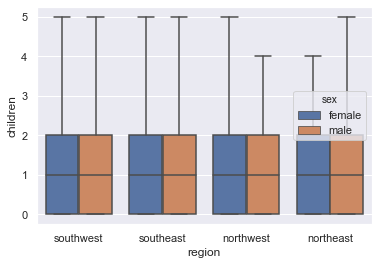

In [58]:
sns.boxplot(ins['region'], ins['children'], hue=ins['sex'])

### Let us now check the correlation between each column using corr() and the pairplot() for visualization.

Correlation is Positive when the values increase together. 
Correlation is Negative when one value decreases as the other increases.

In [60]:
ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


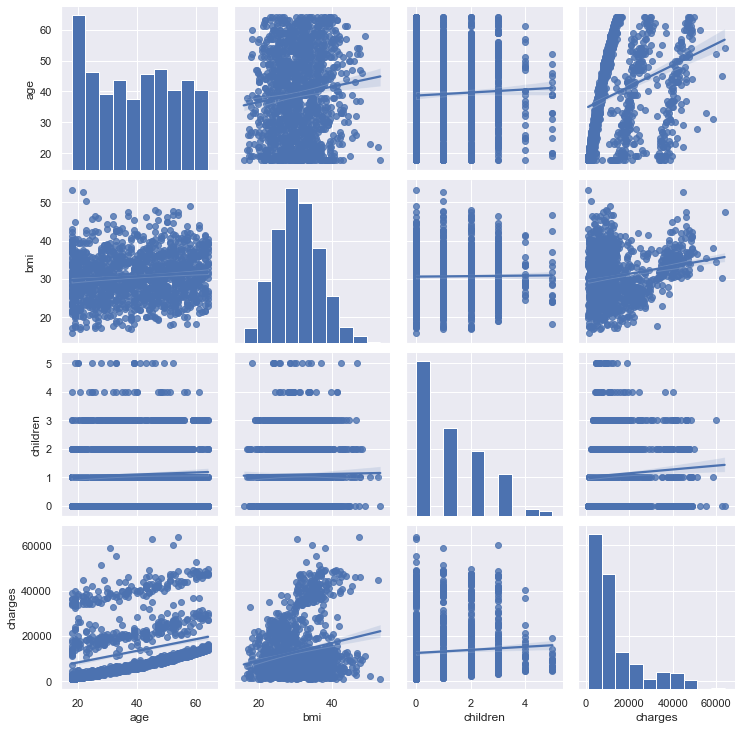

In [62]:
sns.pairplot(ins, kind ='reg')

### Let us perform some hypothesis testing on the given data:

### 1. Do charges of people who smoke differ significantly from the people who don't?
- Let us define the H0 and H1:
    - Null Hypothesis(H0): charges of smokers or non smokers does not differ.
    - Alternate Hypothesis(H1): charges of people who smoke differ significantly from the people who don't.
    

In [70]:
smokers_charge = ins[['smoker','charges']].copy()

In [71]:
smokers_charge.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [93]:
total_smoker_charge = np.array(smokers_charge[smokers_charge['smoker']=='yes']['charges'])
print(total_smoker_charge)

[16884.924   27808.7251  39611.7577  36837.467   37701.8768  38711.
 35585.576   51194.55914 39774.2763  48173.361   38709.176   23568.272
 37742.5757  47496.49445 34303.1672  23244.7902  14711.7438  17663.1442
 16577.7795  37165.1638  39836.519   21098.55405 43578.9394  30184.9367
 47291.055   22412.6485  15820.699   30942.1918  17560.37975 47055.5321
 19107.7796  39556.4945  17081.08    32734.1863  18972.495   20745.9891
 40720.55105 19964.7463  21223.6758  15518.18025 36950.2567  21348.706
 36149.4835  48824.45    43753.33705 37133.8982  20984.0936  34779.615
 19515.5416  19444.2658  17352.6803  38511.6283  29523.1656  12829.4551
 47305.305   44260.7499  41097.16175 43921.1837  33750.2918  17085.2676
 24869.8368  36219.40545 46151.1245  17179.522   42856.838   22331.5668
 48549.17835 47896.79135 42112.2356  16297.846   21978.6769  38746.3551
 24873.3849  42124.5153  34838.873   35491.64    42760.5022  47928.03
 48517.56315 24393.6224  41919.097   13844.506   36085.219   18033.9679
 

In [95]:
total_non_smoker_charge = np.array(smokers_charge[smokers_charge['smoker']=='no']['charges'])
print(total_non_smoker_charge)

[ 1725.5523   4449.462   21984.47061 ...  2205.9808   1629.8335
  2007.945  ]


In [94]:
print('Average charge per smoker:', total_smoker_charge.mean())

Average charge per smoker: 32050.23183153284


In [96]:
print('Average charge per non smoker:', total_non_smoker_charge.mean())

Average charge per non smoker: 8434.268297856204


In [97]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [99]:
t, pval = stats.ttest_ind(total_smoker_charge, total_non_smoker_charge, axis = 0)

In [104]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,5)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,5)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0 the difference is significant. aka |We reject the null|


### 2. Does bmi of males differ significantly from that of females?
- Let us define the H0 and H1:
    - Null Hypothesis(H0): bmi of males or females does not differ.
    - Alternate Hypothesis(H1): bmi of males and females differ significantly.

In [107]:
female_bmi = np.array(ins[ins['sex'] == 'female']['bmi'])
female_bmi

array([27.9  , 25.74 , 33.44 , 27.74 , 25.84 , 26.29 , 39.82 , 30.78 ,
       36.005, 32.4  , 31.92 , 27.72 , 23.085, 32.775, 26.315, 28.6  ,
       32.965, 26.6  , 36.63 , 30.8  , 38.665, 34.77 , 24.53 , 35.625,
       33.63 , 28.69 , 31.825, 22.88 , 37.335, 25.935, 22.42 , 28.9  ,
       39.1  , 36.19 , 24.75 , 28.1  , 29.59 , 39.805, 32.965, 38.285,
       41.23 , 34.8  , 31.16 , 27.2  , 27.74 , 26.98 , 39.49 , 24.795,
       31.3  , 37.62 , 30.8  , 31.6  , 30.115, 29.92 , 27.5  , 28.4  ,
       29.7  , 35.72 , 27.94 , 27.17 , 23.37 , 28.975, 33.915, 28.785,
       28.3  , 37.4  , 17.765, 26.505, 22.04 , 35.9  , 28.785, 28.05 ,
       31.9  , 36.   , 38.83 , 37.73 , 37.43 , 37.145, 23.37 , 25.46 ,
       27.83 , 26.6  , 36.85 , 29.8  , 37.   , 33.155, 31.825, 34.8  ,
       33.345, 37.7  , 28.9  , 33.155, 38.28 , 26.41 , 29.92 , 30.9  ,
       32.2  , 32.11 , 26.2  , 26.6  , 32.8  , 28.6  , 18.05 , 39.33 ,
       32.11 , 32.23 , 24.035, 36.08 , 28.88 , 31.8  , 26.73 , 30.9  ,
      

In [108]:
male_bmi = np.array(ins[ins['sex'] == 'male']['bmi'])
male_bmi

array([33.77 , 33.   , 22.705, 28.88 , 29.83 , 26.22 , 34.4  , 42.13 ,
       24.6  , 23.845, 40.3  , 35.3  , 34.1  , 28.025, 17.385, 36.3  ,
       35.6  , 28.31 , 36.4  , 20.425, 20.8  , 36.67 , 39.9  , 21.78 ,
       37.05 , 37.3  , 35.2  , 28.   , 34.43 , 36.955, 31.68 , 27.36 ,
       33.66 , 24.7  , 26.315, 23.98 , 28.5  , 32.01 , 27.4  , 34.01 ,
       35.53 , 26.885, 37.62 , 22.895, 29.83 , 34.77 , 38.28 , 19.95 ,
       19.3  , 25.46 , 28.025, 30.875, 27.94 , 35.09 , 33.63 , 30.8  ,
       32.205, 28.595, 49.06 , 37.1  , 23.75 , 31.35 , 34.7  , 25.555,
       34.1  , 25.175, 22.42 , 32.49 , 25.3  , 29.735, 28.69 , 30.495,
       28.4  , 24.13 , 29.7  , 39.52 , 24.42 , 25.175, 35.53 , 39.6  ,
       29.64 , 28.215, 18.905, 41.47 , 30.3  , 15.96 , 27.835, 29.2  ,
       28.595, 19.95 , 30.69 , 41.895, 31.57 , 25.74 , 34.43 , 30.59 ,
       22.3  , 26.4  , 27.74 , 41.23 , 33.   , 30.875, 28.5  , 23.1  ,
       30.8  , 34.8  , 24.64 , 33.88 , 38.06 , 25.46 , 27.5  , 24.51 ,
      

In [110]:
print('Average BMI per female:', female_bmi.mean())

Average BMI per female: 30.37774924471299


In [111]:
print('Average BMI per male:', male_bmi.mean())

Average BMI per male: 30.943128698224854


In [112]:
t, pval = stats.ttest_ind(male_bmi, female_bmi, axis = 0)

In [113]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,5)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,5)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.08998 the difference is not significant. aka |We fail to reject the null|


### 3. Is the proportion of smokers significantly different in different genders?
- Let us define the H0 and H1:
    - Null Hypothesis(H0): The proportions are equal.
    - Alternate Hypothesis(H1): The two proportions are not equal.

In [116]:
female_smokers = ins[ins['sex'] == 'female'].smoker.value_counts()[1]
female_smokers

115

In [117]:
male_smokers = ins[ins['sex'] == 'male'].smoker.value_counts()[1] 
male_smokers

159

In [119]:
n_females = ins.sex.value_counts()[1]
n_females

662

In [120]:
n_males = ins.sex.value_counts()[0]
n_males

676

In [121]:
print(f' Proportion of smokers in females, males = {round(female_smokers/n_females,2)}%, {round(male_smokers/n_males,2)}% respectively')

 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [122]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


### 4. Is the proportion of smokers significantly different in different genders?
- Let us define the H0 and H1:
    - Null Hypothesis(H0): Distribution of bmi across women with no children, one child and two children are the same.
    - Alternate Hypothesis(H1): Distribution of bmi across women with no children, one child and two children are not the same or atleast one pair is not the same.

In [129]:
female_bmi = ins[['bmi', 'sex', 'children']].copy()
female_bmi = female_bmi[female_bmi['sex'] == 'female']
female_bmi.drop('sex', axis = 1, inplace = True)
female_bmi

,bmi,children
0,27.90,0
5,25.74,0
6,33.44,1
7,27.74,3
9,25.84,0
...,...,...
1332,44.70,3
1334,31.92,0
1335,36.85,0
1336,25.80,0


In [138]:
children_group = female_bmi.groupby('children').groups

children_group

{0: Int64Index([   0,    5,    9,   11,   13,   20,   26,   31,   40,   47,
             ...
             1306, 1308, 1311, 1316, 1326, 1331, 1334, 1335, 1336, 1337],
            dtype='int64', length=289),
 1: Int64Index([   6,   16,   21,   23,   58,   63,   76,   91,   95,  104,
             ...
             1218, 1220, 1225, 1239, 1257, 1262, 1263, 1287, 1299, 1302],
            dtype='int64', length=158),
 2: Int64Index([  27,   41,   43,   46,   51,   56,   59,   66,   84,   94,
             ...
             1264, 1279, 1281, 1290, 1297, 1313, 1319, 1323, 1328, 1330],
            dtype='int64', length=119),
 3: Int64Index([   7,   25,   36,   54,   72,   96,  103,  124,  138,  145,  152,
              159,  167,  179,  187,  231,  255,  264,  267,  301,  345,  366,
              376,  378,  389,  396,  429,  459,  460,  486,  536,  540,  558,
              603,  613,  643,  647,  676,  708,  725,  732,  734,  756,  785,
              810,  811,  854,  861,  869,  883,  912,  970,

In [139]:
no_child = female_bmi['bmi'][children_group[0]]
one_child = female_bmi['bmi'][children_group[1]]
two_child = female_bmi['bmi'][children_group[2]]

# Perform the ANOVA
stat, pval = stats.f_oneway(no_child, one_child, two_child)

In [140]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.7159 the difference is not significant. aka |We fail to reject the null|
